In [8]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import pandas as pd


In [9]:
x = [0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]
y = [0,    0,    0,    0,    0,    0,    1,    0,    1,    0,    1,    0,    1,    0,    1,    1,    1,    1,    1,    1]

X_test = [0, 1, 2, 3, 4, 5]

In [10]:
X = sm.add_constant(x)

logit = sm.Logit(y,X).fit_regularized()
proba = (logit.predict(X))

# estimate confidence interval for predicted probabilities
cov = logit.cov_params()
gradient = (proba * (1 - proba) * X.T).T # matrix of gradients for each observation
std_errors = np.array([np.sqrt(np.dot(np.dot(g, cov), g)) for g in gradient])

c = 1.96 # multiplier for confidence interval
upper = np.maximum(0, np.minimum(1, proba + std_errors * c))
lower = np.maximum(0, np.minimum(1, proba - std_errors * c))


Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.4014939232249575
            Iterations: 14
            Function evaluations: 14
            Gradient evaluations: 14


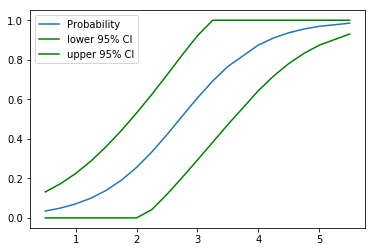

In [11]:
plt.plot(x, proba, label ='Probability')
plt.plot(x, lower, color='g',label='lower 95% CI')
plt.plot(x, upper, color='g', label = 'upper 95% CI')
plt.legend()
plt.show()

### Generate Random values


In [12]:
rnd_hrs = np.random.uniform(0,5,1000)
rnd_hrs = np.sort(rnd_hrs,axis=0)
rnd_X = sm.add_constant(rnd_hrs)
rnd_proba = (logit.predict(rnd_X))
print(rnd_proba)
i = 0
for item in rnd_proba:
    if item<0.5:
        rnd_proba[i] = 0
    else:
        item = rnd_proba[i] = 1
    i += 1

print(rnd_proba,rnd_hrs)

[0.01668186 0.0168278  0.01686138 0.01694537 0.01716546 0.01726646
 0.01758003 0.01796966 0.01799772 0.01810399 0.01820169 0.01836499
 0.01846407 0.01849691 0.01856864 0.01890045 0.01927987 0.01939173
 0.01952495 0.01957552 0.01959841 0.01962436 0.01965546 0.01990107
 0.01994999 0.01997635 0.01998454 0.02005501 0.02029218 0.02049474
 0.02052545 0.02075355 0.02081972 0.02089225 0.02090648 0.02110975
 0.02125091 0.02145409 0.02146181 0.02149756 0.02173882 0.0220021
 0.02201702 0.02220298 0.0222767  0.02238462 0.02238924 0.02252601
 0.02253325 0.02284266 0.02308511 0.02312204 0.02333364 0.02346576
 0.02346605 0.02362478 0.02378904 0.02380491 0.0246142  0.02478408
 0.02493954 0.02538992 0.02551688 0.02585682 0.02590386 0.02596466
 0.02603382 0.0261213  0.0261494  0.02640731 0.02642718 0.02654381
 0.02675933 0.02692907 0.02711089 0.02722064 0.02727253 0.02739246
 0.02739713 0.02802203 0.02843031 0.02847835 0.02848971 0.02859632
 0.02890135 0.02911114 0.02922682 0.02942867 0.02945255 0.02948

In [13]:

preds = []
for i in range(1000):
    boot_idx = np.random.choice(len(rnd_X), replace=True, size=len(rnd_X))
    Y=[]
    for i in boot_idx:
        Y.append(rnd_proba[i])
    try:
        model = sm.Logit(Y, rnd_X[boot_idx]).fit_regularized()
        sorted = np.sort(rnd_X[boot_idx],axis=0)      
        preds.append(logit.predict(sorted))
    except:
        pass
    

# print(preds)

/anaconda3/anaconda3/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1214: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.    (Exit mode 0)
            Current function value: 9.130458928301162e-11
            Iterations: 56
            Function evaluations: 57
            Gradient evaluations: 56
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 8.86911861411812e-11
            Iterations: 57
            Function evaluations: 58
            Gradient evaluations: 57
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.3217463195443404e-10
            Iterations: 56
            Function evaluations: 56
            Gradient evaluations: 56
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 9.754840884251084e-11
            Iterations: 51
            Function evaluations: 52
            Gradient evaluations: 51
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.0695346192211774e-10
            Iterations: 59
   

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.1242767982894358e-10
            Iterations: 55
            Function evaluations: 55
            Gradient evaluations: 55
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.0574018347418948e-10
            Iterations: 55
            Function evaluations: 55
            Gradient evaluations: 55
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.0579934299881855e-10
            Iterations: 57
            Function evaluations: 57
            Gradient evaluations: 57
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.3698711923205516e-10
            Iterations: 54
            Function evaluations: 54
            Gradient evaluations: 54
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 9.148451294807562e-11
            Iterations: 55


Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.1494380852704738e-10
            Iterations: 55
            Function evaluations: 55
            Gradient evaluations: 55
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7.824983223333504e-11
            Iterations: 59
            Function evaluations: 60
            Gradient evaluations: 59
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 8.065482555701336e-11
            Iterations: 48
            Function evaluations: 49
            Gradient evaluations: 48
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 9.087420464017714e-11
            Iterations: 56
            Function evaluations: 57
            Gradient evaluations: 56
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 9.774736739767134e-11
            Iterations: 56
   

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.3598977983887534e-10
            Iterations: 58
            Function evaluations: 58
            Gradient evaluations: 58
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 9.612967120885406e-11
            Iterations: 57
            Function evaluations: 58
            Gradient evaluations: 57
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7.278118462644487e-11
            Iterations: 53
            Function evaluations: 54
            Gradient evaluations: 53
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 9.391193675148722e-11
            Iterations: 57
            Function evaluations: 58
            Gradient evaluations: 57
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.355652376337125e-10
            Iterations: 58
   

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.1078301560922219e-10
            Iterations: 59
            Function evaluations: 59
            Gradient evaluations: 59
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.1720433785964074e-10
            Iterations: 57
            Function evaluations: 57
            Gradient evaluations: 57
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.2496102900492973e-10
            Iterations: 59
            Function evaluations: 59
            Gradient evaluations: 59
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.1917409014973231e-10
            Iterations: 53
            Function evaluations: 53
            Gradient evaluations: 53
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.355685191629495e-10
            Iterations: 58


Optimization terminated successfully.    (Exit mode 0)
            Current function value: 8.704584499008913e-11
            Iterations: 56
            Function evaluations: 57
            Gradient evaluations: 56
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.0897091422209277e-10
            Iterations: 50
            Function evaluations: 50
            Gradient evaluations: 50
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7.629426537365749e-11
            Iterations: 59
            Function evaluations: 60
            Gradient evaluations: 59
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 9.989814966760665e-11
            Iterations: 55
            Function evaluations: 56
            Gradient evaluations: 55
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.2736314407902418e-10
            Iterations: 51
  

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.1922867863448298e-10
            Iterations: 57
            Function evaluations: 57
            Gradient evaluations: 57
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 8.884710639872634e-11
            Iterations: 56
            Function evaluations: 57
            Gradient evaluations: 56
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 9.202017371171355e-11
            Iterations: 58
            Function evaluations: 59
            Gradient evaluations: 58
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7.573670644332629e-11
            Iterations: 56
            Function evaluations: 57
            Gradient evaluations: 56
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 9.0237325886245e-11
            Iterations: 51
     

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 9.90855948632436e-11
            Iterations: 56
            Function evaluations: 57
            Gradient evaluations: 56
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.1391037973282788e-10
            Iterations: 59
            Function evaluations: 59
            Gradient evaluations: 59
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.4294986306112993e-10
            Iterations: 59
            Function evaluations: 59
            Gradient evaluations: 59
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7.935052141549303e-11
            Iterations: 59
            Function evaluations: 60
            Gradient evaluations: 59
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.3432018433662752e-10
            Iterations: 59
  

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7.951474925574008e-11
            Iterations: 57
            Function evaluations: 58
            Gradient evaluations: 57
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.3405948517266745e-10
            Iterations: 57
            Function evaluations: 57
            Gradient evaluations: 57
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7.857818571461905e-11
            Iterations: 55
            Function evaluations: 56
            Gradient evaluations: 55
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.0521856270925308e-10
            Iterations: 52
            Function evaluations: 52
            Gradient evaluations: 52
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 9.457983366337195e-11
            Iterations: 58
  

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.1168291787365382e-10
            Iterations: 57
            Function evaluations: 57
            Gradient evaluations: 57
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.3001109923347658e-10
            Iterations: 58
            Function evaluations: 58
            Gradient evaluations: 58
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.094835271001441e-10
            Iterations: 57
            Function evaluations: 57
            Gradient evaluations: 57
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.0941516514102959e-10
            Iterations: 59
            Function evaluations: 59
            Gradient evaluations: 59
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 8.806564384716743e-11
            Iterations: 51
 

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 8.938134497813525e-11
            Iterations: 57
            Function evaluations: 58
            Gradient evaluations: 57
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.242914507738275e-10
            Iterations: 54
            Function evaluations: 54
            Gradient evaluations: 54
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7.31393621706116e-11
            Iterations: 53
            Function evaluations: 54
            Gradient evaluations: 53
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.1517075479273793e-10
            Iterations: 52
            Function evaluations: 52
            Gradient evaluations: 52
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.2426030854691385e-10
            Iterations: 58
   

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 9.670711110308613e-11
            Iterations: 57
            Function evaluations: 58
            Gradient evaluations: 57
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.0502951160785689e-10
            Iterations: 59
            Function evaluations: 59
            Gradient evaluations: 59
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 9.234336777503105e-11
            Iterations: 57
            Function evaluations: 58
            Gradient evaluations: 57
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 8.652800395291031e-11
            Iterations: 53
            Function evaluations: 54
            Gradient evaluations: 53
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.404350416947494e-10
            Iterations: 51
   

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.3002032985094803e-10
            Iterations: 57
            Function evaluations: 57
            Gradient evaluations: 57
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 9.783552674155736e-11
            Iterations: 56
            Function evaluations: 57
            Gradient evaluations: 56
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.3684108182217042e-10
            Iterations: 59
            Function evaluations: 59
            Gradient evaluations: 59
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.4026911871074927e-10
            Iterations: 57
            Function evaluations: 57
            Gradient evaluations: 57
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.436769537215336e-10
            Iterations: 57
 

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 8.946567509217936e-11
            Iterations: 51
            Function evaluations: 52
            Gradient evaluations: 51
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.262620283656126e-10
            Iterations: 60
            Function evaluations: 60
            Gradient evaluations: 60
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 8.14250857693672e-11
            Iterations: 57
            Function evaluations: 58
            Gradient evaluations: 57
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 9.102420834078634e-11
            Iterations: 55
            Function evaluations: 56
            Gradient evaluations: 55
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 9.587256618565075e-11
            Iterations: 57
     

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.1058292232316799e-10
            Iterations: 56
            Function evaluations: 56
            Gradient evaluations: 56
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.0932945156718554e-10
            Iterations: 58
            Function evaluations: 58
            Gradient evaluations: 58
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.221880091803642e-10
            Iterations: 57
            Function evaluations: 58
            Gradient evaluations: 57
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.0074017006202448e-10
            Iterations: 59
            Function evaluations: 59
            Gradient evaluations: 59
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 8.035274613213658e-11
            Iterations: 58
 

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7.797824005310117e-11
            Iterations: 54
            Function evaluations: 55
            Gradient evaluations: 54
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7.54632952936582e-11
            Iterations: 54
            Function evaluations: 55
            Gradient evaluations: 54
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7.278480630258522e-11
            Iterations: 58
            Function evaluations: 59
            Gradient evaluations: 58
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 8.315755763347668e-11
            Iterations: 57
            Function evaluations: 58
            Gradient evaluations: 57
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.172123280517008e-10
            Iterations: 61
     

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7.796462457577164e-11
            Iterations: 57
            Function evaluations: 58
            Gradient evaluations: 57
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 9.62489642119848e-11
            Iterations: 59
            Function evaluations: 60
            Gradient evaluations: 59
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.177443135005562e-10
            Iterations: 48
            Function evaluations: 48
            Gradient evaluations: 48
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.0431889430756961e-10
            Iterations: 51
            Function evaluations: 51
            Gradient evaluations: 51
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.1563632542855305e-10
            Iterations: 58
   

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.4095806771611965e-10
            Iterations: 59
            Function evaluations: 59
            Gradient evaluations: 59
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 9.660187339246994e-11
            Iterations: 54
            Function evaluations: 55
            Gradient evaluations: 54
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 9.381214034874881e-11
            Iterations: 58
            Function evaluations: 59
            Gradient evaluations: 58
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.0962704153628462e-10
            Iterations: 54
            Function evaluations: 54
            Gradient evaluations: 54
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.0860019822952854e-10
            Iterations: 51
 

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7.793419140353129e-11
            Iterations: 56
            Function evaluations: 57
            Gradient evaluations: 56
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 8.853315128777221e-11
            Iterations: 54
            Function evaluations: 55
            Gradient evaluations: 54
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.3002893430255228e-10
            Iterations: 59
            Function evaluations: 59
            Gradient evaluations: 59
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.4338855120979428e-10
            Iterations: 58
            Function evaluations: 58
            Gradient evaluations: 58
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7.34161519645312e-11
            Iterations: 57
   

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 8.51940558226398e-11
            Iterations: 58
            Function evaluations: 59
            Gradient evaluations: 58
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.3461966683704797e-10
            Iterations: 57
            Function evaluations: 57
            Gradient evaluations: 57
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7.704903534476293e-11
            Iterations: 61
            Function evaluations: 62
            Gradient evaluations: 61
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.1701331999611884e-10
            Iterations: 58
            Function evaluations: 58
            Gradient evaluations: 58
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 8.422930397249848e-11
            Iterations: 50
   

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 8.692010156354356e-11
            Iterations: 58
            Function evaluations: 59
            Gradient evaluations: 58
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.1156140705404399e-10
            Iterations: 51
            Function evaluations: 51
            Gradient evaluations: 51
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 9.243878372599327e-11
            Iterations: 57
            Function evaluations: 58
            Gradient evaluations: 57
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.0880510189026856e-10
            Iterations: 58
            Function evaluations: 58
            Gradient evaluations: 58
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.0250623883526413e-10
            Iterations: 56
 

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 8.083066198868442e-11
            Iterations: 62
            Function evaluations: 63
            Gradient evaluations: 62
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 9.305140319310513e-11
            Iterations: 52
            Function evaluations: 53
            Gradient evaluations: 52
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.2237714771804774e-10
            Iterations: 58
            Function evaluations: 58
            Gradient evaluations: 58
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.3871741259328854e-10
            Iterations: 53
            Function evaluations: 53
            Gradient evaluations: 53
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.292309951504133e-10
            Iterations: 57
  

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 9.802410723460383e-11
            Iterations: 57
            Function evaluations: 58
            Gradient evaluations: 57
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.418549299831013e-10
            Iterations: 56
            Function evaluations: 56
            Gradient evaluations: 56
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 8.054873419457947e-11
            Iterations: 57
            Function evaluations: 58
            Gradient evaluations: 57
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 8.492023152303138e-11
            Iterations: 53
            Function evaluations: 54
            Gradient evaluations: 53
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 9.540448614408143e-11
            Iterations: 56
    

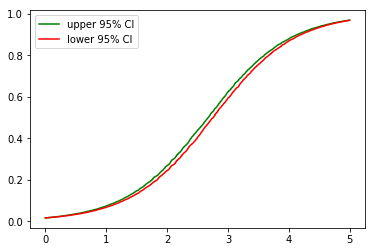

In [7]:

p = np.array(preds)
plt.plot(rnd_X[:, 1], np.percentile(p, 95, axis=0),color='g',label='upper 95% CI')
plt.plot(rnd_X[:, 1], np.percentile(p, 5, axis=0),color='r',label='lower 95% CI')
plt.legend()
plt.show()
